In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import scipy as sc
import sympy as smp

# Introduction :

symbols can be defined as follows :

In [17]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [20]:
x**2

x**2

In [22]:
smp.sin(x)

sin(x)

there are many many functions built into sympy

In [ ]:
#smp. #press tab to autocomplete and see all functions

Can save expression in new variables

In [29]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do Operations on the new variables :

In [31]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it does not expand . There are different methods you need to call to do different things with the expression :

In [35]:
z.factor()

(x + 1)**2*(x + 3)**2

In [37]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation smp.solve(f,x) , sympy finds the value of x that makes f(x) = 0. i.e. Roots of the equation.

In [40]:
smp.solve(z,x)

[-3, -1]

In [42]:
smp.solve(smp.sin(x), x)

[0, pi]

Good Practice : If you know that your variable x is real (and in some cases non-negative) it's good to specify this when you define your varaibles to prevent complicated issues when solving complicated problems (especially with integrals).

In [54]:
x =smp.symbols('x')
smp.solve(x**2 + 1 , x)

[-I, I]

In [58]:
x =smp.symbols('x', real=True)
smp.solve(x**2 - 1 , x)

[-1, 1]

Can define many variables at once

In [65]:
x, y, z = smp.symbols('x y z')
f = x**2 + smp.sin(z)*y
f

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which varaible we want to solve for. In each case, F = 0 is being solved for

In [76]:
x_sols = smp.solve(f, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [78]:
y_sols = smp.solve(f,y)
y_sols

[-x**2/sin(z)]

In [80]:
z_sols = smp.solve(f,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [94]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [100]:
Fz = smp.lambdify([x,y], expr)
Fz(1,2)

3.6651914291880923

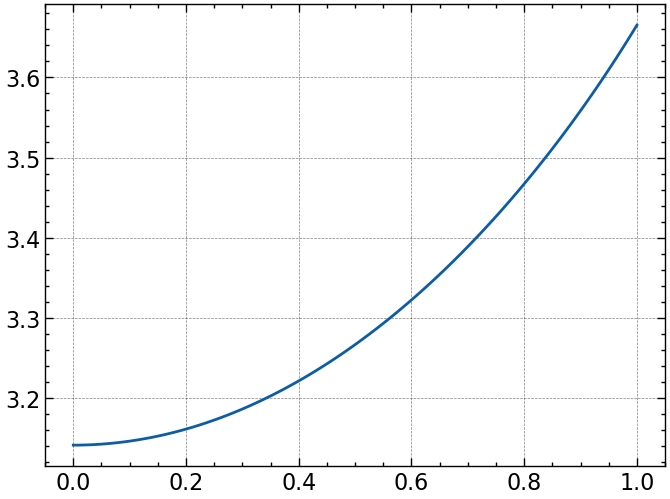

In [104]:
x_num = np.linspace(0, 1, 100)
y_num = 2
plt.plot(x_num, Fz(x_num, y_num))

For multivariable expressions, can also substitutes values in

In [107]:
f

x**2 + y*sin(z)

In [113]:
f.subs([(y,3),(z, smp.pi/2)])

x**2 + 3

# Examples

A falling object encounters a moving platform accelerating upwards:

1. Object $ h_{o}(t)=h_{0}-v_{o}t-\frac{1}{2}gt^{2} $

2. Platform $ h_{p}(t)=v_{p}t+\frac{1}{2}qt^{2} $

Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.

We need to solve for v_0 and t in the two equations

1. $ h_{0}(t)=h_{p}(t) $
2. $ \frac{dh_{0}}{dt}(t)=-\frac{dh_{p}}{dt}(t) $

In sympy, need to construct our system of equations as $ Eq_{1}=0, Eq_{2}=0 $. In our case, we rewrite them as

1. $ h_{0}(t)-h_{p}(t)=0 $
2. $ \frac{dh_{0}}{dt}+\frac{dh_{p}}{dt}=0 $

### Solution :

In [17]:
t, h0, v0, vp, g, q = smp.symbols('t h_0 v_0 v_p g q', real=True, positive=True) 


Define expressions

In [19]:
h0t = h0 - v0*t - smp.Rational(1/2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1/2)*q*t**2
dhpdt = vp + q*t

Define equations

In [21]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Solve the equations

In [23]:
eq1

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

In [27]:
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [29]:
t_collide, v_initial = smp.solve([eq1, eq2], [t, v0])[0]

In [31]:
v_initial

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [175]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

### What is the velocity when they collide?

In [184]:
dh0dt.subs([(t, t_collide), (v0, v_initial)])

g*(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q) - v_p/3 - sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [186]:
dh0dt.subs([(t, t_collide), (v0, v_initial)]).simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [188]:
dhpdt.subs([(t, t_collide), (v0, v_initial)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Calculus (1st Year)

In [191]:
x = smp.symbols('x')

## Limits

$$ \lim_{x \to \pi} sin(x/2 + sin(x)) $$

In [202]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

## Derivatives

$$ \frac{d}{dx}\left(\frac{1 + sinx}{1 - cosx} \right)^2 $$

In [211]:
x = smp.symbols('x')
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$ \frac{d}{dx} [f(x + g(x))] $$

In [217]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x + g)

In [219]:
f

f(x + g(x))

In [221]:
dfdx = smp.diff(f, x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [223]:
dfdx.subs([(g, smp.sin(x))]).doit()    # need to call doit

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

## Basic Anti-derivatives

$$ \int csc(x)cot(x)dx $$ 

In [228]:
x = smp.symbols('x')
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

## Definite Integrals

$$ \int_{0}^{ln(4)} \frac{e^xdt}{\sqrt {e^{2x} + 9}} $$

In [8]:
x = smp.symbols('x')
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$ \int_{1}^{t} x^{10} e^x dx $$

In [245]:
t = smp.symbols('t')
smp.integrate(x**10*smp.exp(x), (x, 1 , t)) 

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Quantum Uncertainity and Expectation value of the radial distance of a electron

### The Hydrogen wave function is given by :

$$ \psi _{nlm} = \mathbb{R}_{nl}(r) Y_{l}^{m}(\theta, \phi) $$

$$ R_{nl}(r) = \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n - l -1)!}{2n[(n + 1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l [L_{n-l-1}^{2l+1} (2r/na)] $$

The mean distance of the electron from the nucleus : 

$$ \braket{r} = \int \hat{r} R^2_{nl} r^2 dr $$

The Quantum Uncertainity(Std) in the distance from the nucleus of the electron :

$$ \sigma = \sqrt{\braket{r^2} -\braket{r}^2} = \sqrt{\Bigg(\int_{0}^{\infty} R^2_{nl} r^4 dr \Bigg) - \Bigg(\int_{0}^{\infty} R^2_{nl} r^3 dr \Bigg)^2} $$

In [3]:
from sympy import assoc_laguerre

Define variables, be sure to specify their attributes

In [6]:
r, a = smp.symbols('r a', real=True, positive=True)
n,l = smp.symbols('n l', integer=True, positive=True)

Define $R_nl(r)$

In [9]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) * smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1, 2*l+1, (2*r/(n*a)))

In [11]:
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

We can check to make sure this corresponds to the radial wavefunctions we expect. Lets see $R_{10}(r)$ i.e. The radial function for the Ground state of the Hydrogen

In [99]:
R_10 = R.subs([(n,1), (l,0)])
R_10

2*exp(-r/a)/a**(3/2)

Function to compute $\int_{0}^{\infty} R_{nl}^{2}r^{k}dr$ for particular values of n,l and k.

In [592]:
def exp_r(n_val, l_val, k):
    R_nl = R.subs([(n, n_val), (l, l_val)])
    return smp.integrate(R_nl**2 * r**k, (r, 0, smp.oo))

Compute the spread or uncertainity $\sigma$ (std) in distances of the electron in state $\psi_{100}$ :

In [595]:
std = smp.sqrt(exp_r(n_val=1, l_val=0, k=4) - exp_r(n_val=1, l_val=0, k=3)**2)
std

sqrt(3)*a/2

Compute the mean radial distance of an electron in state $\psi_{nlm}$ :

In [15]:
def R_nl(n_val, l_val):
    R_f = R.subs([(n, n_val), (l, l_val), (a, 1)])
    return smp.integrate(R_f**2 * r**3, (r, 0, smp.oo))

Compute the mean radial distance of an electron in state $\psi_{100}$ :

In [16]:
R_nl(1, 0)

3/2

Compute the mean radial distance of an electron in state $\psi_{420}$

In [21]:
R_nl(4, 2)

1.11090000000000e-9

In [21]:
R_nl(n, 0).simplify()

4*Integral(r**3*exp(-2*r/n)*assoc_laguerre(n - 1, 1, 2*r/n)**2, (r, 0, oo))/n**5

In [17]:
R_nl(2, l)

factorial(1 - l)*Integral(r**3*r**(2*l)*exp(-r)*assoc_laguerre(1 - l, 2*l + 1, r)**2, (r, 0, oo))/(4*factorial(l + 2))

To plot Mean Radial Distance [R] Vs Principle Quantum number [n] graph, lets define a function

In [11]:
def R_n0(n_val, l_val):
    R_g = R.subs([(n, n_val), (l, l_val), (a, 1)])
    return smp.integrate(R_g**2 * r**3, (r, 0, smp.oo))

In [29]:
def f(l):
    x = np.arange(l+1, 11, 1)
    y = [R_n0(i, l) for i in x]
    return plt.plot(x, y, 'o-')

Text(0.5, 1.0, 'For Hydrogen atom')

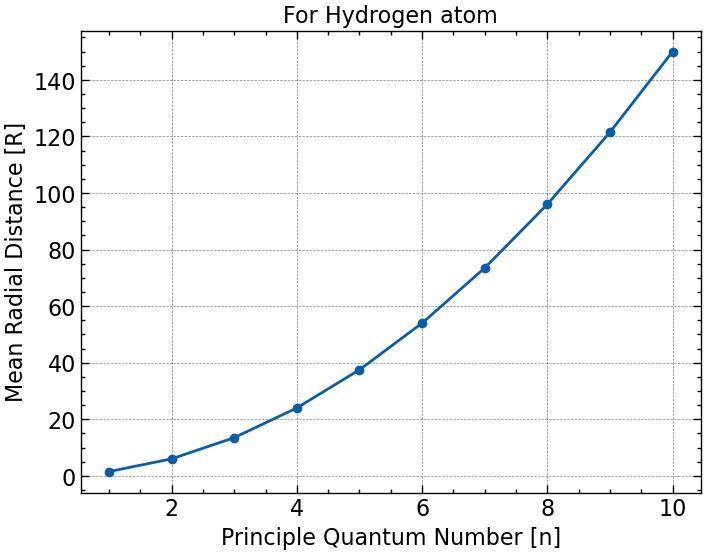

In [47]:
f(0)
plt.xlabel('Principle Quantum Number [n]')
plt.ylabel('Mean Radial Distance [R]')
plt.title('For Hydrogen atom')

To plot Mean Radial Distance [R] Vs Azimuthal Quantum number [l] graph

In [21]:
def g(n):
    x = np.arange(0, n-1, 1)
    y = [R_n0(n, i) for i in x]
    return plt.plot(x, y, 'o-')

Text(0.5, 1.0, 'For Hydrogen atom')

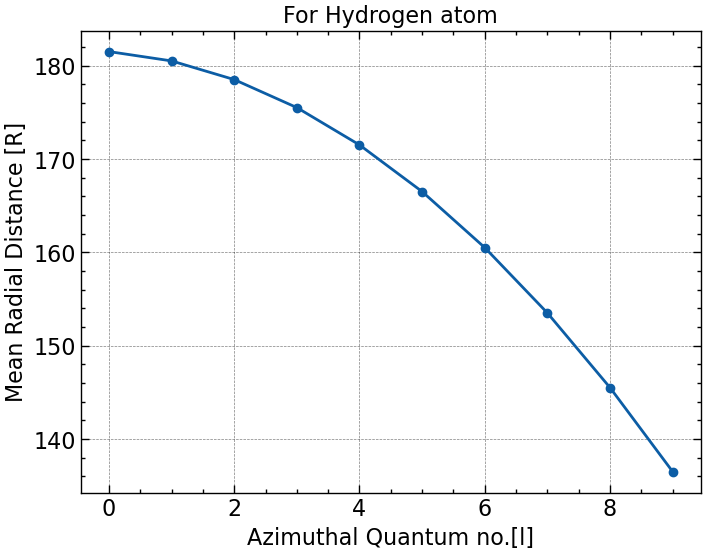

In [45]:
g(11)
plt.xlabel('Azimuthal Quantum no.[l]')
plt.ylabel('Mean Radial Distance [R]')
plt.title('For Hydrogen atom')

# Multivariable Calculus

In [8]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

In [50]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Addition and Multiplication

In [53]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [55]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [57]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [59]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [61]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $\vec{r}(t) = \vec{r}_{0} + t\vec{v}$

In [12]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes : $\vec{n}. (P_{0} - \bra x, y,\ket z) = 0 $

In [25]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Vector Calculus

### Vector Derivatives

In [29]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [31]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

Example : Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [50]:
v = smp.diff(r, t)
a = smp.diff(v, t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

Find theta at t = 6.

In [59]:
A = smp.lambdify([t], theta)

In [61]:
A(6)

0.25110801569233787

In [83]:
x = theta.subs([(t, 6)]).evalf()
x

0.251108015692338

### Vector Integrals

(Note: Will not add the +C)

In [87]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [103]:
smp.Integral(r,t)

Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)

In [124]:
smp.integrate(r,(t, 0, 1)).evalf()

Matrix([
[0.815496711718266],
[0.844838594757102],
[0.302299894039036]])

Some integrals can't be solved analytically.

In [107]:
from scipy.integrate import quad_vec

In [112]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

### Arc Length 

$$ L = \int_{a}^{b} \sqrt{dx^2 + dy^2 + dz^2} = \int_{a}^{b} \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2} $$

In [10]:
r = smp.Matrix([0, t, t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [12]:
smp.diff(r,t).norm()

sqrt(4*Abs(t)**2 + 1)

In [136]:
smp.integrate(smp.diff(r,t).norm(), (t,0,1)).evalf()

1.47894285754460

### Examples 

The magnetic field at a point $\vec{r}$ of a current configuration is :

$\vec{B}(\vec{r}) = \frac{\mu_{0}}{4\pi} \int{\left(\frac{I\frac{d\vec{l}}{dt} \times (\vec{r} - \vec{l})}{|\vec{r} - \vec{l}|^3} \right)dt}$

where $\vec{r} = (x,y,z)\ and\ \vec{l} = (f(t),g(t),h(t))$ is a 1D curve in space that gives the location of the wire.

$\textbf{Part 1: Use Sympy to find the integrand as a single 3-vector}$

In [3]:
x,y,z,t, I, mu0 = smp.symbols('x y z t I \mu_0', real = True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f = f(t)
g = g(t)
h = h(t)

Define $\vec{r},\ \vec{l}\ and\ d\vec{l}/dt$

In [6]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l) 

Define Integrand

In [9]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

In [57]:
int = smp.integrate(dBdt, t)
int

Matrix([
[-I*(Integral(y*Derivative(h(t), t)/(sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(x - f(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(y - g(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(z - h(t))**2), t) + Integral(-z*Derivative(g(t), t)/(sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(x - f(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(y - g(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(z - h(t))**2), t) + Integral(-g(t)*Derivative(h(t), t)/(sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(x - f(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(y - g(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(z - h(t))**2), t) + Integral(h(t)*Derivative(g(t), t)/(sqrt(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)*Abs(x - f(t))**2 + sqrt(Abs(x - f(t))**2 + Abs(y - g(t

$\textbf{Part 2}$ : Find the magnetic field at a distance $\textbf{H}$ above a ring of radius $\textbf{R}$ flowing clockwise

In [11]:
R, H = smp.symbols('R H', real=True)

In [13]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                 (g, R*smp.sin(t)),
                 (h, 0), (x,0), (y,0), (z, H)]).doit()
dBdt

Matrix([
[                       H*I*R*cos(t)/(H**2 + R**2*sin(t)**2 + R**2*cos(t)**2)**(3/2)],
[                       H*I*R*sin(t)/(H**2 + R**2*sin(t)**2 + R**2*cos(t)**2)**(3/2)],
[I*(R**2*sin(t)**2 + R**2*cos(t)**2)/(H**2 + R**2*sin(t)**2 + R**2*cos(t)**2)**(3/2)]])

In [15]:
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

Find the Magnetic Field

In [162]:
((R*smp.sin(t))**2 + (R*smp.cos(t))**2).simplify()

R**2

In [17]:
B = mu0/(4*smp.pi) *smp.integrate(dBdt, [t,0, 2*smp.pi]).doit()
B.simplify()

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

# Partial / Directional Derivatives

In [110]:
x, y, z = smp.symbols('x y z')

### Basics

Partial Derivatives $\partial{f}/ \partial{x}$ and $\partial{f}/ \partial{y}$ of $f(x,y) = y^2sin(x + y)$

In [24]:
f = y**2 * smp.sin(x + y)
smp.diff(f,x)

y**2*cos(x + y)

In [31]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

OR more complicated things like $\partial^2{f}/ \partial{x}\partial{y}$

In [29]:
smp.diff(f, y, x)

y*(-y*sin(x + y) + 2*cos(x + y))

## Chain Rule

In [34]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x y z w v', cls=smp.Function)

Suppose x, y and z are functions of t \
w is a function of x,y,z and z.i.e w = w(x,y,z)

Find dw/dt

x = x(t)
y = y(t)
z = z(t)
w = w(x,y,z)

Can keep things in a more functional form :

In [49]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

or put in specific functions

In [62]:
w = x**2 + smp.exp(y)*smp.sin(z)
dw = smp.diff(w,t).subs([(x, smp.sin(t)), (y, smp.cos(t)), (z, t**2)]).doit()
dw

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

In [64]:
dw.simplify()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + sin(2*t)

# Multiple Integrals

in rare cases these can be done symbolically : 

$$ \int_{0}^{1} \int_{0}^{1-x^2} \int_{3}^{4-x^2-y^2} xdzdydx $$

In [80]:
x, y, z = smp.symbols('x, y, z')
smp.integrate(x, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

# Lagrangian Mechanics

The simplified idea of Lgrangian mechanics is that the kinetic energy and potential energy of a system can be expressed in terms of generalized coordinates and velocity.

$$ T = T(q, \dot{q}) \ \ \ \ \ \ \ \ V = V(q, \dot{q}) $$

where q could be anything xyz of a point particle, or some angle $\theta$ (pendulum), or whatever makes the problem easiest to solve. the defining L = T - V, the following equation gives the equations of motion q(t)

$$ \frac{dL}{dq} - \frac{d}{dt} \frac{dL}{d\dot{q}} = 0$$ 

for all the different q's of the system. the equation above gives a second order differential equation for all the different q(t).

$\textbf{Example}$ : Find the equation of motion (in the form of differential equations)

Let (x,y) be the postion of the pendulum bob

In [113]:
t, R, g, m1, m2 = smp.symbols('t, R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z = z(t)
theta = theta(t)

dzdt = smp.diff(z,t)
dthedt = smp.diff(theta, t)

In [115]:
theta

\theta(t)

Define the location of pendulum

In [118]:
x = z + R*smp.sin(theta)
y = -R*smp.cos(theta)

kinetic and potential energies

In [121]:
T1 = smp.Rational(1/2) * m1 * smp.diff(z,t)**2
T2 = smp.Rational(1/2) * m2 * (smp.diff(x,t)**2 + smp.diff(y,t)**2)
T = T1 + T2
V1 = 0
V2 = -m2*g*y
V = V1 + V2

Get Lagrangian

In [124]:
L = T - V

Get Lagrangian equations of motion

In [127]:
L

-R*g*m_2*cos(\theta(t)) + m_1*Derivative(z(t), t)**2/2 + m_2*(R**2*sin(\theta(t))**2*Derivative(\theta(t), t)**2 + (R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))**2)/2

In [129]:
LE1 = smp.diff(L, z) - smp.diff(smp.diff(L, dzdt), t)
LE2 = smp.diff(L, theta) - smp.diff(smp.diff(L, dthedt), t)

In [131]:
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

In [133]:
LE2

R*g*m_2*sin(\theta(t)) + m_2*(2*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t))/2 - m_2*(2*R**2*sin(\theta(t))**2*Derivative(\theta(t), (t, 2)) + 4*R**2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2 - 2*R*(R*cos(\theta(t))*Derivative(\theta(t), t) + Derivative(z(t), t))*sin(\theta(t))*Derivative(\theta(t), t) + 2*R*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(z(t), (t, 2)))*cos(\theta(t)))/2

we want a system of two second order differential equations that we can solve

In [151]:
sol = smp.solve([LE1,LE2], [smp.diff(z,t,t), smp.diff(theta,t,t)])
sol

{Derivative(\theta(t), (t, 2)): -R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) + g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2),
 Derivative(z(t), (t, 2)): R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)}

Find $d^2\theta/dt^2$ = 

In [145]:
sol[smp.diff(theta,t,t)].simplify()

(-R*m_2*cos(\theta(t))*Derivative(\theta(t), t)**2 + g*m_1 + g*m_2)*sin(\theta(t))/(R*(m_1 + m_2*sin(\theta(t))**2))

Find $d^2z/dt^2$ =

In [230]:
sol[smp.diff(z,t,t)].simplify()

m_2*(R*Derivative(\theta(t), t)**2 - g*cos(\theta(t)))*sin(\theta(t))/(m_1 + m_2*sin(\theta(t))**2)

with these two second order differential equations, the system can be numerically solved!

## Finding the expectation value of x and p for a Harmonic Oscillator

In [4]:
from sympy import hermite
from sympy import oo

In [295]:
x , a, n = smp.symbols('x a n')
H , psi , f = smp.symbols('H psi f', cls=smp.Function)
H = hermite(n,a*x)
psi = H * smp.exp(-(a**2*x**2)/2)
f = psi * smp.diff( psi , x)

In [297]:
H

hermite(n, a*x)

In [299]:
psi

exp(-a**2*x**2/2)*hermite(n, a*x)

In [301]:
f

(-a**2*x*exp(-a**2*x**2/2)*hermite(n, a*x) + 2*a*n*exp(-a**2*x**2/2)*hermite(n - 1, a*x))*exp(-a**2*x**2/2)*hermite(n, a*x)

In [303]:
def exp(m):
    f_n = f.subs([(n, m)])
    return smp.integrate(f_n ,(x, -oo,oo))

In [309]:
exp(3)

Piecewise((0, Abs(arg(a)) < pi/4), (Integral((8*a**3*x**3 - 12*a*x)*(-a**2*x*(8*a**3*x**3 - 12*a*x)*exp(-a**2*x**2/2) + 6*a*(4*a**2*x**2 - 2)*exp(-a**2*x**2/2))*exp(-a**2*x**2/2), (x, -oo, oo)), True))

In [6]:
x , a, n = smp.symbols('x a n')
H , psi , f = smp.symbols('H psi f', cls=smp.Function)
H = hermite(n,a*x)
psi = H * smp.exp(-(a**2*x**2)/2)
f = x**2 * psi**2

In [319]:
H

hermite(n, a*x)

In [321]:
psi

exp(-a**2*x**2/2)*hermite(n, a*x)

In [323]:
f

x*exp(-a**2*x**2)*hermite(n, a*x)**2

In [10]:
def exp(m):
    f_n = f.subs([(n, m)])
    return smp.integrate(f_n ,(x, -oo,oo))

In [327]:
exp(3)

Piecewise((0, Abs(arg(a)) < pi/4), (Integral(x*(8*a**3*x**3 - 12*a*x)**2*exp(-a**2*x**2), (x, -oo, oo)), True))

In [12]:
exp(0)

Piecewise((sqrt(pi)/(2*a**3), Abs(arg(a)) < pi/4), (Integral(x**2*exp(-a**2*x**2), (x, -oo, oo)), True))

## Dispersion Relation in a conducting Medium

In [192]:
a, b, m, e, w, s = smp.symbols(r' \alpha \beta \mu \epsilon \omega \sigma', real=True)
f = a**2 - b**2 - w**2*m*e
g = 2*a*b - m*s*w

In [194]:
f

\alpha**2 - \beta**2 - \epsilon*\mu*\omega**2

In [196]:
g

2*\alpha*\beta - \mu*\omega*\sigma

In [228]:
sol = smp.solve([f,g],[a,b])
sol

[(-2*sqrt(-\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)*(\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)/(\mu*\omega*\sigma),
  -sqrt(-\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)),
 (2*sqrt(-\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)*(\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)/(\mu*\omega*\sigma),
  sqrt(-\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)),
 (-2*sqrt(-\epsilon*\mu*\omega**2/2 + \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)*(\epsilon*\mu*\omega**2/2 + \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)/(\mu*\omega*\sigma),
  -sqrt(-\epsilon*\mu*\omega**2/2 + \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)),
 (2*sqrt(-\epsilon*\mu*\omega**2/2 + \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)*(\epsilon*\mu*\omega**2/2 + \mu*\omega*sqrt(\epsil

In [242]:
sol[0][1]

-sqrt(-\epsilon*\mu*\omega**2/2 - \mu*\omega*sqrt(\epsilon**2*\omega**2 + \sigma**2)/2)

# Guided Waves

In [3]:
x,y,z,i,w,k,c = smp.symbols(r'x y z i w k c')
E_x, E_y, E_z, B_x, B_y, B_z = smp.symbols(r'E_x E_y E_z B_x B_y B_z', cls=smp.Function)
E_x = E_x(x,y)
E_y = E_y(x,y)
E_z = E_z(x,y)
B_x = B_x(x,y)
B_y = B_y(x,y)
B_z = B_z(x,y)
eq1 = smp.diff(E_z, x) + i*w*B_y - i*k*E_x
eq2 = smp.diff(E_z, y) - i*w*B_x - i*k*E_y
eq3 = smp.diff(B_z, x) - i*w/(c**2)*E_y - i*k*B_x
eq4 = smp.diff(B_z, y) + i*w/(c**2)*E_x - i*k*B_y
eq5 = smp.diff(E_y, x) - smp.diff(E_x, y) - i*w*B_z
eq6 = smp.diff(B_y, x) - smp.diff(B_x, y) + i*w/(c**2)*E_z

In [268]:
eq1

-i*k*E_x(x, y) + i*w*B_y(x, y) + Derivative(E_z(x, y), x)

In [270]:
eq3

-i*k*B_x(x, y) + Derivative(B_z(x, y), x) - i*w*E_y(x, y)/c**2

In [5]:
sol = smp.solve([eq1, eq2, eq3, eq4, eq5, eq6], [E_x, E_y, E_z, B_x, B_y, B_z])
sol

{B_x(x, y): (-c**2*k*Derivative(B_z(x, y), x) + w*Derivative(E_z(x, y), y))/(-c**2*i*k**2 + i*w**2),
 B_y(x, y): (-c**2*k*Derivative(B_z(x, y), y) - w*Derivative(E_z(x, y), x))/(-c**2*i*k**2 + i*w**2),
 B_z(x, y): (-Derivative(E_x(x, y), y) + Derivative(E_y(x, y), x))/(i*w),
 E_x(x, y): (-c**2*k*Derivative(E_z(x, y), x) - c**2*w*Derivative(B_z(x, y), y))/(-c**2*i*k**2 + i*w**2),
 E_y(x, y): (-c**2*k*Derivative(E_z(x, y), y) + c**2*w*Derivative(B_z(x, y), x))/(-c**2*i*k**2 + i*w**2),
 E_z(x, y): (c**2*Derivative(B_x(x, y), y) - c**2*Derivative(B_y(x, y), x))/(i*w)}

In [11]:
E_xs = sol[E_x].simplify()
E_xs

c**2*(k*Derivative(E_z(x, y), x) + w*Derivative(B_z(x, y), y))/(i*(c**2*k**2 - w**2))

In [13]:
E_ys = sol[E_y].simplify()
E_ys

c**2*(k*Derivative(E_z(x, y), y) - w*Derivative(B_z(x, y), x))/(i*(c**2*k**2 - w**2))

In [17]:
B_xs = sol[B_x].simplify()
B_xs

(c**2*k*Derivative(B_z(x, y), x) - w*Derivative(E_z(x, y), y))/(i*(c**2*k**2 - w**2))

In [19]:
B_ys = sol[B_y].simplify()
B_ys

(c**2*k*Derivative(B_z(x, y), y) + w*Derivative(E_z(x, y), x))/(i*(c**2*k**2 - w**2))

In [28]:
B_zs = sol[B_z].simplify()
B_zs

(-Derivative(E_x(x, y), y) + Derivative(E_y(x, y), x))/(i*w)

In [32]:
B_z0 = B_zs.subs([(E_y, E_ys),(E_x, E_xs)]).simplify()
B_z0.simplify()

c**2*(Derivative(B_z(x, y), (x, 2)) + Derivative(B_z(x, y), (y, 2)))/(i**2*(-c**2*k**2 + w**2))

In [39]:
r_1, r_2, a, b, c = smp.symbols('r1 r2 a b c')
I_1 = smp.integrate(r_2**2*smp.exp(-4*r_2/a), (r_2, 0, r_1)).simplify()

In [41]:
I_1

a*(a**2*exp(4*r1/a) - a**2 - 4*a*r1 - 8*r1**2)*exp(-4*r1/a)/32

In [43]:
I_2 = smp.integrate(r_2*smp.exp(-4*r_2/a), (r_2, r_1, smp.oo)).simplify()

In [79]:
r, a, z, x, u = smp.symbols('r a z x u')
f = r*smp.exp(-4*r/a)
g = (r + 2*r**2/a)*smp.exp(-8*r/a)

In [53]:
f

r*exp(-4*r/a)

In [61]:
g

(r + 2*r**2/a)*exp(-8*r/a)

In [57]:
smp.integrate(f, (r, , smp.oo))

Piecewise((a**2/16, Abs(arg(a)) < pi/2), (Integral(r*exp(-4*r/a), (r, 0, oo)), True))

In [63]:
smp.integrate(g, (r, 0, smp.oo))

Piecewise((3*a**2/128, Abs(arg(a)) < pi/2), (Integral((r + 2*r**2/a)*exp(-8*r/a), (r, 0, oo)), True))

In [116]:
u = smp.integrate(r*smp.exp(-2*z*r/a), (r, 0, smp.oo)).simplify()
u

Piecewise((a**2/(4*z**2), Abs(arg(z)) < pi/2), (Integral(r*exp(-2*r*z/a), (r, 0, oo)), True))

## Probability Density Plot of the Hydrogenic electron

### Wavefunction of the Hydrogen Atom

$$ \Large \psi _{nlm} = R_{nl}(r) \mathbb{Y}_{l}^{m}(\theta, \phi) $$

### Radial wavefuntion of a single electron Atom

$$ \Large R_{nl}(r) = \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n - l -1)!}{2n[(n + 1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l [L_{n-l-1}^{2l+1} (2r/na)] $$

In [333]:
import cmath
from sympy import *
from sympy import assoc_laguerre
from sympy import assoc_legendre

In [183]:
assoc_legendre(2, 1, x)

-3*x*sqrt(1 - x**2)

In [430]:
r, a, Z = smp.symbols('r a Z', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)
m = smp.symbols('m', integer=True)
t, p = smp.symbols(r'\theta \phi')

In [516]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) * smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1, 2*l+1, (2*r/(n*a))).simplify()
Y = smp.sqrt(((2*l+1)*(smp.factorial(l-m)))/(4*smp.pi*(smp.factorial(l+m)))) * smp.exp(I*m*p) * (assoc_legendre(l, m, (smp.cos(t)))).simplify()

In [518]:
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

In [343]:
Y

sqrt(factorial(l - m)/factorial(l + m))*sqrt(2*l + 1)*exp(I*\phi*m)*assoc_legendre(l, m, cos(\theta))/(2*sqrt(pi))

In [494]:
def R_nl(n_val, l_val, r_val):
    R_f = R.subs([(n, n_val), (l, l_val), (r, r_val)]).simplify()
    return R_f

In [496]:
R_nl(1, 0, r)

2*exp(-r/a)/a**(3/2)

In [490]:
def Y_lm(l_val, m_val, t_val, p_val):
    Y_f = Y.subs([(l, l_val), (m, m_val), (t, t_val), (p, p_val)]).simplify()
    return Y_f

In [492]:
Y_lm(1, 1, t, p)

-sqrt(6)*sqrt(sin(\theta)**2)*exp(I*\phi)/(4*sqrt(pi))

In [498]:
Y_lm(1, 1, smp.pi/4, smp.pi)

sqrt(3)/(4*sqrt(pi))

In [484]:
psi = smp.symbols(r'\psi', cls=smp.Function)
psi = R*Y

In [488]:
psi.simplify()

a**(-l - 3/2)*n**(-l - 2)*(2*r)**l*sqrt(factorial(-l + n)/(-l + n))*sqrt(factorial(l - m)/factorial(l + m))*sqrt(2*l + 1)*exp(I*\phi*m - r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*assoc_legendre(l, m, cos(\theta))/(sqrt(pi)*sqrt(factorial(l + n)))

In [500]:
def psi_nlm(n_0, l_0, m_0):
    psi_f = psi.subs([(n, n_0), (l, l_0), (m, m_0)]).simplify()
    return psi_f

In [502]:
psi_nlm(1, 0, 0)

exp(-r/a)/(sqrt(pi)*a**(3/2))

In [563]:
psi_nlm(100, 3, -1)

sqrt(1320900119)*r**3*(5*cos(\theta)**2 - 1)*(248000356302256973411247038700665052027868165203087409688717812220370890487019096855756116744110097847048646487629494071006774902343750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*a**96 - 59520085512541673618699289288159612486688359648740978325292274932889013716884583245381468018586423483291675157031078577041625976562500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000*a**95*r + 62826756929905099930849249804168479847059935184782143787808512429160625590044837870124882908507891454585657110199471831321716308593750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Solving a integral for a Problem of 1-D Infinite potential Well in Quantum Mechanics 

In [3]:
x = smp.symbols('x')
L, n = smp.symbols('L n', integer=True, positive=True, real=True)

In [26]:
f = smp.sin(5*smp.pi*x/L) * smp.cos(2*smp.pi*x/L)
f

sin(5*pi*x/L)*cos(2*pi*x/L)

In [32]:
smp.integrate(f**2 , (x, 0, L))

L/4

In [34]:
g = smp.sin(n*smp.pi*x/L) * f
g

sin(5*pi*x/L)*sin(pi*n*x/L)*cos(2*pi*x/L)

In [36]:
smp.integrate(g , (x, 0, L))

Piecewise((L/4, Eq(n, 3) | Eq(n, 7)), (0, True))

In [9]:
 smp.integrate(smp.cos(x)**4, (x, -smp.pi/2, smp.pi/2))

3*pi/8

In [7]:
x0, x, n = smp.symbols(r'x_0 x n')
f = (x/x0)**n * smp.exp(-x/x0)

In [9]:
f

(x/x_0)**n*exp(-x/x_0)

In [15]:
smp.diff(f, x).simplify()

(x/x_0)**n*(n*x_0 - x)*exp(-x/x_0)/(x*x_0)

In [17]:
smp.diff(f, (x, 2))

(x/x_0)**n*(-2*n/(x*x_0) + n*(n - 1)/x**2 + x_0**(-2))*exp(-x/x_0)